# Code for Linear Regression

Firstly loading the data and spliting it into input and output

In [2]:
import numpy as np
data=np.loadtxt("data.csv",delimiter=",")
input=data[:,0]
output=data[:,1]

Now we will divide this data into training and testing

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,output,random_state=3)

Firstly we will define some functions like one for finding optimal coefficient,one for calculating cost,one for predicting output given an input using optimal coefficient

In [4]:
def get_optimal_coefficients(x_train,y_train):
    '''
    Takes training data as input and returns the optimal coefficient ie. m and c values for minimum cost in form of tuple (m,c)
    '''
    m=((x_train*y_train).mean()-(x_train.mean()*y_train.mean()))/((x_train**2).mean()-(x_train.mean()**2))
    c=y_train.mean()-(m*x_train.mean())
    return (m,c)

In [10]:
def predict(x_test,m,c):
    '''
    Takes testing input,m,c as input and returns the y predicted following linear model
    '''
    return (m*x_test)+c #as x_test is array so this function returns y_predicted array

In [6]:
def coefficient_of_determination(y_predicted,y_actual):
    '''
    Calculates the score of the algorithm
    '''
    u=((y_predicted-y_actual)**2).sum()
    v=((y_actual-y_actual.mean())**2).sum()
    return 1-(u/v)

In [21]:
def cost(x,y,m,c):
    '''
    Returns cost wrt m,c and given input and output
    '''
    return ((y-(m*x+c))**2).sum()

Now we will use above for our data

In [17]:
m,c=get_optimal_coefficients(x_train,y_train)
print("Slope : ",m)
print("Intercept : ",c)

Slope :  1.3564840226402484
Intercept :  6.566992797895509


In [18]:
y_predicted=predict(x_test,m,c)
for i in range(len(y_predicted)):
    print(y_test[i]-y_predicted[i]) #so got an idea kitna far away hai y_predicted from actual y

20.845011865897476
11.158986823977074
2.2505122455839626
17.694182701904566
-1.2481152942803533
-9.032840784954544
-5.656549187904034
8.41556667363659
-12.337000234805046
-12.251271011284096
-1.4303907869317172
-6.549367892127876
-15.714791275177888
10.787129282294998
-10.486727102257248
19.72117939691273
2.5841613540640793
-11.571943659685338
-2.9632782935224
-5.31143987459771
-7.229549199774858
-4.4658970696358296
3.5105290358408894
-0.4717284820615504
-14.56139040910437


In [19]:
print("Score : ",coefficient_of_determination(y_predicted,y_test)) #to get an actual score value instead of above se better idea lag

Score :  0.41773449983247557


In [25]:
print("Cost : ",cost(x_test,y_test,m,c))

Cost :  2746.974600484099


See variation of cost with different m values

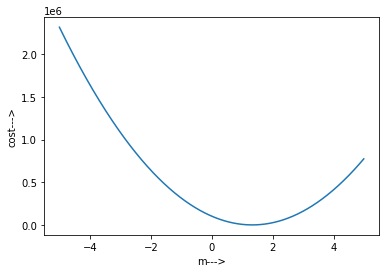

In [28]:
import matplotlib.pyplot as plt
slope_values=np.arange(-5,+5,0.01)
cost_value=np.zeros(len(slope_values),int)
for i in range(len(slope_values)):
    cost_value[i]=cost(x_test,y_test,slope_values[i],c)
plt.plot(slope_values,cost_value)
plt.axis
plt.xlabel("m--->")
plt.ylabel("cost--->")
plt.show()

So it is clear that m=1.35 ke liye min aa rha cost so whi kiya

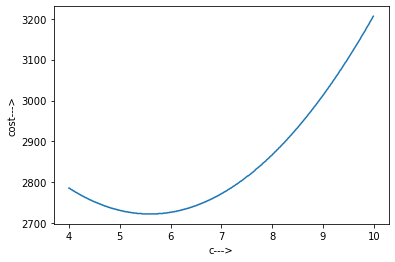

In [30]:
#similar work wrt c->
import matplotlib.pyplot as plt
intercept_values=np.arange(4,10,0.01)
cost_value=np.zeros(len(intercept_values),int)
for i in range(len(intercept_values)):
    cost_value[i]=cost(x_test,y_test,m,intercept_values[i])
plt.plot(intercept_values,cost_value)
plt.axis
plt.xlabel("c--->")
plt.ylabel("cost--->")
plt.show()

Again clear that ek c value ke liye min hai